In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

mng_df = pd.read_csv('/Users/ana/Desktop/marketing.csv') 

In [89]:
mng_df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [90]:
mng_df = mng_df.drop(columns = ["unnamed:_0", "customer", "effective_to_date"])

In [91]:
mng_df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [104]:
mng_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month'],
      dtype='object')

In [105]:
unique_values = mng_df['education'].unique()
print("Unique Values:", unique_values)

unique_values1 = mng_df['vehicle_size'].unique()
print("Unique Values:", unique_values1)


Unique Values: ['College' 'Bachelor' 'High School or Below' 'Doctor' 'Master']
Unique Values: ['Medsize' 'Small' 'Large']


In [106]:
import numpy as np

In [107]:
categoricals = mng_df.select_dtypes(include=object)
numericals = mng_df.select_dtypes(include = np.number)

In [108]:
ordinals = categoricals[["coverage","education","vehicle_size"]]
nominals = categoricals.drop(columns=["coverage","education","vehicle_size"])

In [109]:
from sklearn.preprocessing import OrdinalEncoder

In [110]:
enc = OrdinalEncoder(categories=[["Basic","Extended","Premium"]])

ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])

enc1 = OrdinalEncoder(categories=[["High School or Below","College","Bachelor","Master","Doctor"]])

ordinals["education"] = enc1.fit_transform(ordinals[["education"]])

enc2 = OrdinalEncoder(categories=[["Small","Medsize","Large"]])

ordinals["vehicle_size"] = enc2.fit_transform(ordinals[["vehicle_size"]])

/var/folders/_l/b5p4kls92w1cb97642gbtjh80000gn/T/ipykernel_22769/3706543508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])
/var/folders/_l/b5p4kls92w1cb97642gbtjh80000gn/T/ipykernel_22769/3706543508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["education"] = enc1.fit_transform(ordinals[["education"]])
/var/folders/_l/b5p4kls92w1cb97642gbtjh80000gn/T/ipykernel_22769/3706543508.py:11: SettingWithCopyWarning: 
A value is tryi

In [111]:
ordinals

,coverage,education,vehicle_size
0,0.0,1.0,1.0
1,0.0,1.0,1.0
2,0.0,2.0,1.0
3,1.0,1.0,1.0
4,2.0,2.0,1.0
...,...,...,...
10905,2.0,2.0,1.0
10906,0.0,1.0,1.0
10907,1.0,2.0,1.0
10908,2.0,1.0,1.0


In [112]:
nominals = pd.get_dummies(nominals, dtype = int)

In [113]:
nominals

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,0,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
10907,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
10908,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [114]:
final_df = pd.concat([numericals,ordinals,nominals], axis=1)

In [115]:
final_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,coverage,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,0.0,...,0,0,0,1,0,0,0,0,0,1
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,0.0,...,0,1,0,1,0,0,0,0,0,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,0.0,...,0,1,0,0,0,0,1,0,0,1
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,1.0,...,1,0,0,1,0,0,0,0,0,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,2.0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1,2.0,...,0,0,1,0,1,0,0,0,0,1
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1,0.0,...,1,0,0,1,0,0,0,0,0,1
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2,1.0,...,0,0,1,0,0,1,0,0,0,1
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2,2.0,...,1,0,0,0,0,0,1,0,0,1


**X-y split**

In [116]:
target = 'total_claim_amount'
X = final_df.drop(target, axis=1)
y = final_df[target]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      customer_lifetime_value  income  monthly_premium_auto  \
3105              4665.129599       0                    62   
6032             10288.924950   96337                   127   
157               4873.436612   18866                   126   
6964              6944.739992       0                    68   
6349              2472.469209   63860                    62   
...                       ...     ...                   ...   
5734              3810.238281       0                   108   
5191              3815.851163   38651                    98   
5390              7850.590399       0                    69   
860               4974.235309       0                    70   
7270             38055.209530       0                   115   

      months_since_last_claim  months_since_policy_inception  \
3105                     26.0                             62   
6032                     19.0                             12   
157                       4.0                      

In [121]:
scaler = StandardScaler()
scaler_fitted = scaler.fit(X_train)
X_train_scaled = scaler_fitted.transform(X_train)
X_test_scaled = scaler_fitted.transform(X_test)

**Model Training**

In [122]:
lm = LinearRegression()
model = lm.fit(X_train_scaled,y_train)

In [123]:
model.coef_

array([-1.82847049e+00, -7.79417008e+00,  1.83811844e+02,  3.38533018e+00,
       -7.29993449e-01, -1.66564088e+00,  1.40283289e+00, -3.24672494e-01,
       -5.67470087e+00, -6.05734453e+00, -1.30560528e+00, -1.32883815e+14,
       -1.69627447e+14, -1.00476637e+14, -1.54983309e+14, -9.69103056e+13,
        3.38115444e+14,  3.38115444e+14, -8.63500940e+13, -2.01195137e+14,
       -8.86996655e+13, -7.13210814e+13, -1.80665979e+14,  6.56215758e+14,
        6.56215758e+14,  1.94514340e+14,  2.37815110e+14,  1.87770940e+14,
       -3.17994141e+14, -4.39431138e+14, -3.95489263e+14,  1.78446278e+14,
       -8.91675845e+14,  2.32435675e+15, -5.89757192e+14, -7.28443885e+14,
       -9.51244983e+14, -1.82318804e+14, -2.24561636e+14, -2.58658314e+14,
       -1.23672031e+15, -1.92658359e+15, -1.72227402e+15, -1.44840128e+15,
       -1.37458803e+15, -1.07746482e+15, -9.09719405e+14,  1.27647781e+14,
        1.17660785e+14,  1.04618513e+14,  9.36110311e+13, -3.33474831e+14,
       -8.68560275e+13, -

In [124]:
model.intercept_

434.82115804250435

**Create predictions for test set**

In [127]:
y_pred = model.predict(X_test_scaled)

In [128]:
y_pred = pd.DataFrame(y_pred)

In [129]:
y_test = y_test.reset_index(drop=True)

In [134]:
residuals_df = pd.concat([y_test,y_pred],axis=1)

In [135]:
residuals_df

,total_claim_amount,0
0,475.423848,382.978492
1,350.400000,425.407377
2,482.400000,540.228492
3,673.342650,592.688627
4,302.400000,329.657377
...,...,...
2177,432.000000,508.719877
2178,484.800000,499.407377
2179,525.600000,380.907377
2180,47.451832,32.407377


In [137]:
residuals_df = resiudals_df.rename(columns={"total_claim_amount":"y_test", 0:"y_pred"})

In [138]:
residuals_df["residual"] = residuals_df["y_test"]-residuals_df["y_pred"]

In [139]:
residuals_df.head()

,y_test,y_pred,residual
0,475.423848,382.978492,92.445356
1,350.400000,425.407377,-75.007377
2,482.400000,540.228492,-57.828492
3,673.342650,592.688627,80.654023
4,302.400000,329.657377,-27.257377


**Calculating metrics**

In [140]:
mean_error = residuals_df["residual"].mean()

In [141]:
mean_error

0.1262041689923186

In [142]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

In [143]:
mse(y_test,y_pred)

18689.136251699598

In [144]:
mae(y_test,y_pred)

95.3629878584072

In [145]:
rmse = mse(y_test,y_pred, squared = False)

In [146]:
from sklearn.metrics import r2_score

**Computing R2_score for test_set**

In [147]:
round(r2_score(y_test, y_pred),2)

0.77

In [148]:
y_pred_train = pd.DataFrame(model.predict(X_train_scaled))

In [149]:
r2_score(y_train,y_pred_train)

0.7694539976130526

In [150]:
feature_names = list(X_train.columns)

In [151]:
coefficients = model.coef_

In [152]:
coefficients = [i for i in coefficients[0]]

TypeError: 'numpy.float64' object is not iterable

In [153]:
fi_dict = {"name":feature_names,"coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,customer_lifetime_value,-1.828470e+00
1,income,-7.794170e+00
2,monthly_premium_auto,1.838118e+02
3,months_since_last_claim,3.385330e+00
4,months_since_policy_inception,-7.299934e-01
5,number_of_open_complaints,-1.665641e+00
6,number_of_policies,1.402833e+00
7,month,-3.246725e-01
8,coverage,-5.674701e+00
9,education,-6.057345e+00


[Text(0, 0, 'customer_lifetime_value'),
 Text(1, 0, 'income'),
 Text(2, 0, 'monthly_premium_auto'),
 Text(3, 0, 'months_since_last_claim'),
 Text(4, 0, 'months_since_policy_inception'),
 Text(5, 0, 'number_of_open_complaints'),
 Text(6, 0, 'number_of_policies'),
 Text(7, 0, 'month'),
 Text(8, 0, 'coverage'),
 Text(9, 0, 'education'),
 Text(10, 0, 'vehicle_size'),
 Text(11, 0, 'state_Arizona'),
 Text(12, 0, 'state_California'),
 Text(13, 0, 'state_Nevada'),
 Text(14, 0, 'state_Oregon'),
 Text(15, 0, 'state_Washington'),
 Text(16, 0, 'response_No'),
 Text(17, 0, 'response_Yes'),
 Text(18, 0, 'employmentstatus_Disabled'),
 Text(19, 0, 'employmentstatus_Employed'),
 Text(20, 0, 'employmentstatus_Medical Leave'),
 Text(21, 0, 'employmentstatus_Retired'),
 Text(22, 0, 'employmentstatus_Unemployed'),
 Text(23, 0, 'gender_F'),
 Text(24, 0, 'gender_M'),
 Text(25, 0, 'location_code_Rural'),
 Text(26, 0, 'location_code_Suburban'),
 Text(27, 0, 'location_code_Urban'),
 Text(28, 0, 'marital_status_

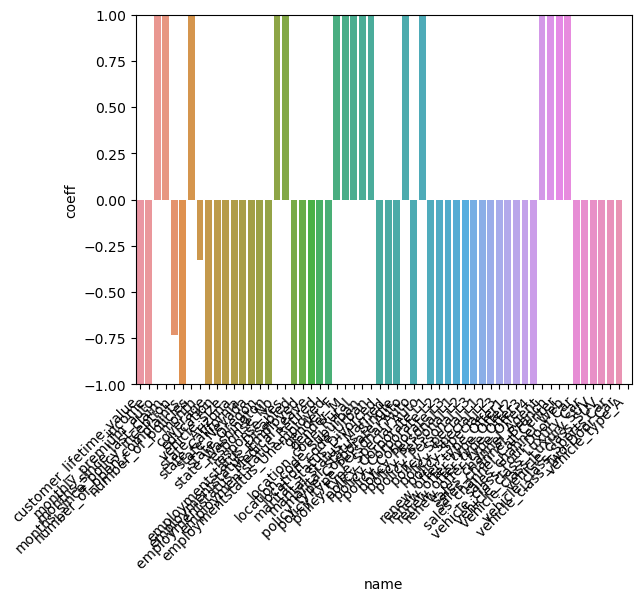

In [161]:
ax = sns.barplot(x = fi_df["name"],y =fi_df["coeff"])
ax.set(ylim=(-1, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")